## Incorp


Objetivo: Saber qual são os melhores locais para lançar produtos e o que lançar, tipo do produto.
Principais indicadores até agora: 
R$/m2 para ter uma noção de lucro
VSO para saber sobre aceitação do produto e demanda x oferta

Imports:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv('data/pesquisa.csv', sep=';')


In [3]:
df.head()

,RGI,Código no Mapa,Empreendimento,Edifício,Zona de Valor,Endereço,Bairro,Distrito,Região,Cidade,...,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,VGV,Modalidade,Banco.1,Condições de pagamento,Responsabilidade do Comprador,Data Pesquisa
0,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,37.5,62.5,15.0,25.0,8290040.0,Preço Fechado,NaN,NaN,NaN,43349.0
1,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,0.0,100.0,0.0,4.0,733200.0,Preço Fechado,NaN,NaN,NaN,43349.0
2,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2355100.0,Preço Fechado,NaN,NaN,NaN,43174.0
3,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2631100.0,Preço Fechado,NaN,NaN,NaN,43069.0
4,36231716.0,3.0,ALTOS DO PACO,NaN,SOROCABA - SP,R JOSE RUSCONI FRANCISCO. 150,JARDIM DO PACO,SEM DISTRITO,NaN,SOROCABA,...,75.0,25.0,18.0,6.0,5880000.0,Preço de Custo,NaN,NaN,NaN,43361.0


In [4]:
df.shape

(378, 73)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 73 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           216 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             83 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                                

# Copiando data frame

In [6]:
df_c = df.copy()

In [7]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 73 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           216 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             83 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                                

In [8]:
df_c.head()

,RGI,Código no Mapa,Empreendimento,Edifício,Zona de Valor,Endereço,Bairro,Distrito,Região,Cidade,...,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,VGV,Modalidade,Banco.1,Condições de pagamento,Responsabilidade do Comprador,Data Pesquisa
0,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,37.5,62.5,15.0,25.0,8290040.0,Preço Fechado,NaN,NaN,NaN,43349.0
1,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,0.0,100.0,0.0,4.0,733200.0,Preço Fechado,NaN,NaN,NaN,43349.0
2,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2355100.0,Preço Fechado,NaN,NaN,NaN,43174.0
3,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2631100.0,Preço Fechado,NaN,NaN,NaN,43069.0
4,36231716.0,3.0,ALTOS DO PACO,NaN,SOROCABA - SP,R JOSE RUSCONI FRANCISCO. 150,JARDIM DO PACO,SEM DISTRITO,NaN,SOROCABA,...,75.0,25.0,18.0,6.0,5880000.0,Preço de Custo,NaN,NaN,NaN,43361.0


# Preenchendo NaN

In [9]:
df_c['Edifício']= df_c['Edifício'].fillna(value='edificio')

In [10]:
df_c['Região']=df_c['Região'].fillna(value='Região')

In [11]:
df_c['Zoneamento']=df_c['Zoneamento'].fillna(value='Zoneamento')

In [12]:
df_c['Classificação do tipo'] = df_c['Classificação do tipo'].fillna(value='Classificação do tipo') 

In [13]:
df_c['Área Total Construída'] = df_c['Área Total Construída'].fillna(value=0)

In [14]:
#drops a coluna Registro de incoporação já havia sido dropada, essa celula foi atualizada. RGI exite
df_c = df_c.drop(['Incorporadora 3', 'Incorporadora 4', 'Vendedora 3', 'Vendedora 4'], axis=1)

In [15]:
df_c['Infraestrutura'] = df_c['Infraestrutura'].fillna(value='Infraestrutura')

In [16]:
df_c = df_c.drop(['Incorporadora 2', 'Construtora 2', 'Condições de pagamento', 'Responsabilidade do Comprador'], axis=1)

In [17]:
df_c['Vendedora 2'] = df_c['Vendedora 2'].fillna(value='Vendedora 2')

In [18]:
df_c['Banco'] = df_c['Banco'].fillna(value='Banco')

In [19]:
df_c['Banco.1'] = df_c['Banco.1'].fillna(value='Banco')

In [20]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 65 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           378 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             378 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                               

Agora vamos plotar os gráficos

count      377.000000
mean      4061.274085
std       2063.021548
min        238.840000
25%       3345.950000
50%       3907.240000
75%       4624.930000
max      26799.040000
Name: (VUV)Preço m2 privativo atualizado IGPM, dtype: float64

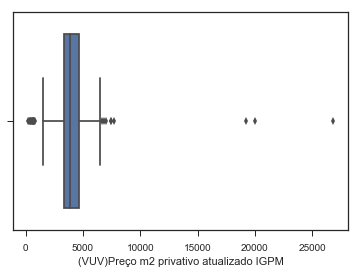

In [21]:
sns.boxplot(df_c['(VUV)Preço m2 privativo atualizado IGPM'])
df_c['(VUV)Preço m2 privativo atualizado IGPM'].describe()

In [22]:
features = list(df_c)

In [23]:
features[1]

'Código no Mapa'

In [24]:
(len(features))

65

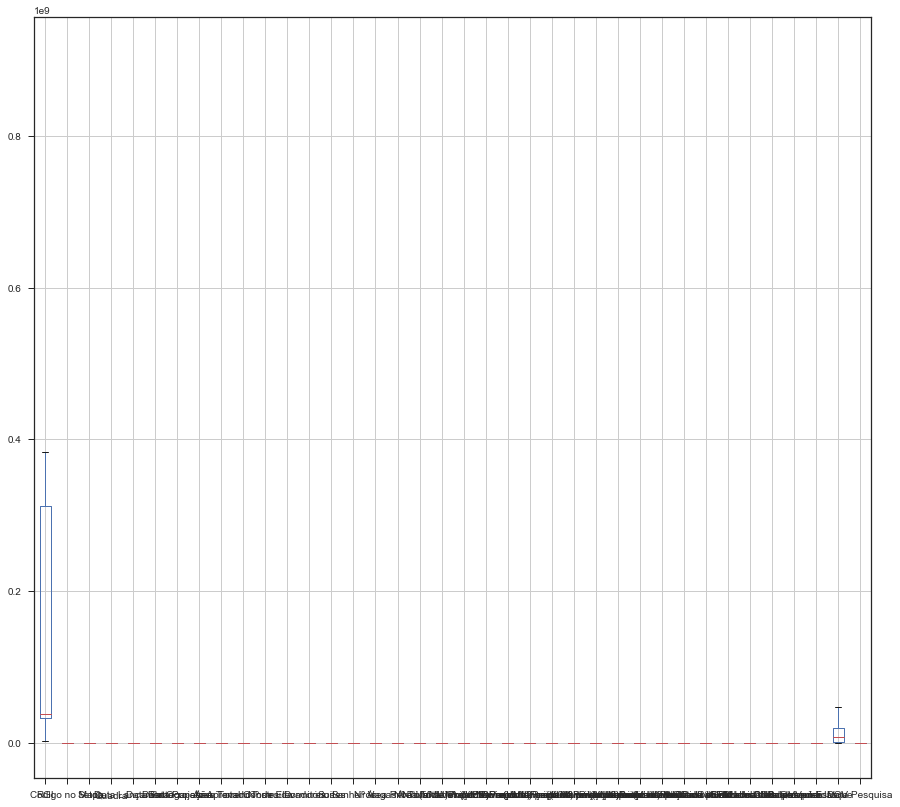

In [25]:
df_c.boxplot(figsize=(15,14))
plt.show()

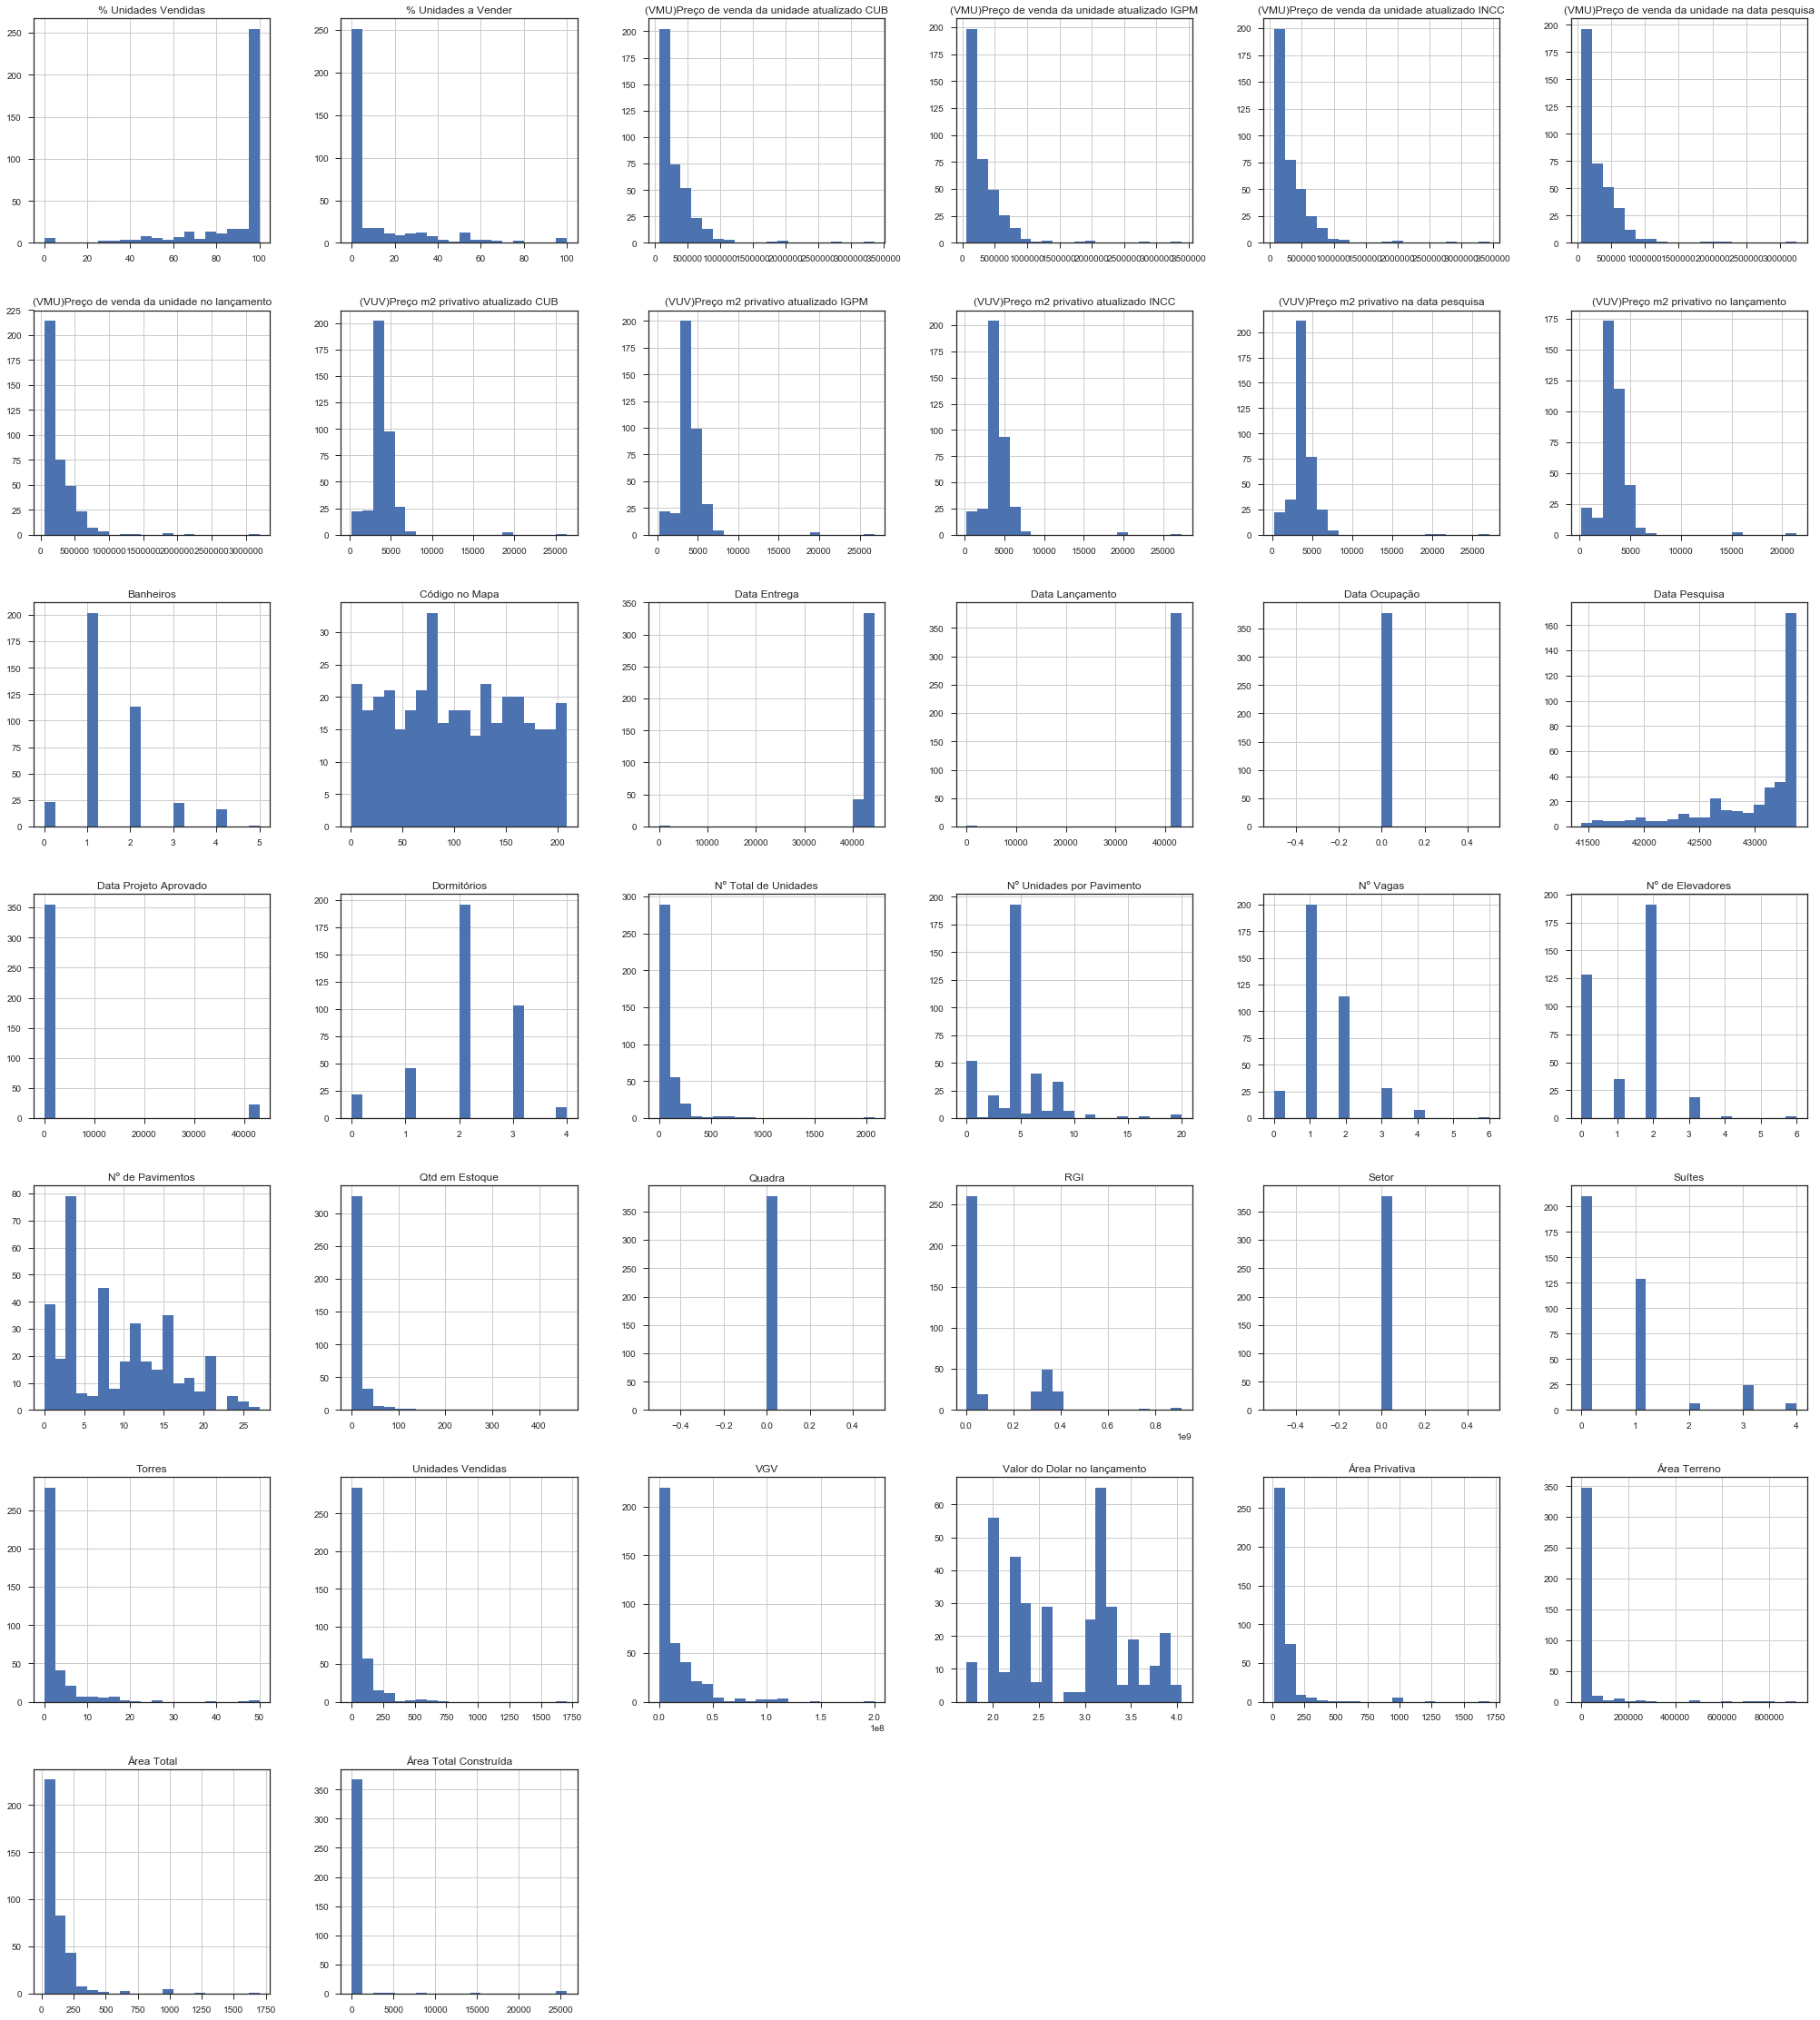

In [26]:
df_c.hist(bins=20, figsize=(35,40))
plt.show()

In [27]:
df_c.iloc[:,2]

0               AF ESPLENDORE
1               AF ESPLENDORE
2           ALICE RESIDENCIAL
3           ALICE RESIDENCIAL
4               ALTOS DO PACO
5                    ALVORADA
6                    ALVORADA
7                    ALVORADA
8                    ALVORADA
9                    ALVORADA
10                   ALVORADA
11                   ARVOREDO
12        ARVORES DA AMAZONIA
13        ARVORES DA AMAZONIA
14        ARVORES DA AMAZONIA
15            ATELIE CAMPOLIM
16                     ATRIUM
17                     ATRIUM
18                     ATRIUM
19                    BEATRIZ
20                  BEETHOVEN
21                 BELISSIMUS
22                 BELLA PARK
23                 BELLA PARK
24                BELLA VILLE
25                BELLA VILLE
26      BLUE AFONSO VERGUEIRO
27      BLUE AFONSO VERGUEIRO
28          BOSQUE DE CORDOBA
29           BOSQUE DE MADRID
                ...          
348       VILLAGE MONTE VERDE
349       VILLAGGIO DI VENETO
350       

In [28]:
df_c['Empreendimento'].value_counts()

LE MONDE CAMPOLIM           20
PASSEO CONDOMINIO CLUB       7
SOLEIL DE QUEBEC             6
TORRE ALPHA MANGAL           6
ALVORADA                     6
LA VISTA MONCAYO             6
DOC CAMPOLIM                 5
BOULEVARD IPANEMA            4
IMAGINE IPANEMA              4
VANCOUVER                    4
JARDIM DAS TULIPAS           4
WANELL CLUB                  4
FLOR DE ACACIA               4
MONT ROYAL                   4
VITALLI BONELLI              3
ESTILO ALAVANCA              3
JK STUDIO                    3
PREMIERE                     3
EUROPA TOWER                 3
SAFIRA                       3
MONDIAL SOROCABA             3
OLGA BOTANIQUE               3
SPETTACOLO PATRIANI          3
DIJON                        3
WINNER                       3
LUNNA CAMPOLIN               3
ARVORES DA AMAZONIA          3
RESERVA DO HORTO             3
UP RESIDENCIAL               3
EXCLUSIVE CAMPOLIM           3
                            ..
WAY COMPACT PREMIUM          1
PARQUE S

In [83]:
df_c[df_c['Empreendimento']=='LE MONDE CAMPOLIM']

,RGI,Código no Mapa,Empreendimento,Edifício,Zona de Valor,Endereço,Bairro,Distrito,Região,Cidade,...,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,VGV,Modalidade,Banco.1,Data Pesquisa
136,329941115.0,75.0,LE MONDE CAMPOLIM,TORRE 1 (AMERICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,545295.0,5398.96,83.333333,16.666667,5.0,1.0,2352000.0,Preço Fechado,Banco,43369.0
137,329941115.0,75.0,LE MONDE CAMPOLIM,TORRE 1 (AMERICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,306637.0,4945.76,95.238095,4.761905,40.0,2.0,10290000.0,Preço Fechado,Banco,43369.0
138,329941115.0,75.0,LE MONDE CAMPOLIM,TORRE 1 (AMERICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,248562.0,5178.38,94.117647,5.882353,32.0,2.0,6426000.0,Preço Fechado,Banco,43369.0
139,329941115.0,75.0,LE MONDE CAMPOLIM,TORRE 1 (AMERICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,686689.0,5323.17,100.000000,0.000000,2.0,0.0,1125720.0,Preço Fechado,Banco,43055.0
140,89755174.0,75.0,LE MONDE CAMPOLIM,TORRE 3 (AFRICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,228000.0,4750.00,100.000000,0.000000,40.0,0.0,8430440.0,Preço Fechado,Banco,43369.0
141,89755174.0,75.0,LE MONDE CAMPOLIM,TORRE 3 (AFRICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,290000.0,4677.42,100.000000,0.000000,40.0,0.0,10707320.0,Preço Fechado,Banco,43369.0
142,89755174.0,75.0,LE MONDE CAMPOLIM,TORRE 3 (AFRICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,524799.0,5196.03,0.000000,100.000000,0.0,2.0,868522.0,Preço Fechado,Banco,43369.0
143,89755174.0,75.0,LE MONDE CAMPOLIM,TORRE 3 (AFRICA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,644000.0,4992.25,100.000000,0.000000,2.0,0.0,1189038.0,Preço Fechado,Banco,43369.0
144,35730516.0,75.0,LE MONDE CAMPOLIM,TORRE 2 (EUROPA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,248562.0,5178.38,95.000000,5.000000,38.0,2.0,8409320.0,Preço Fechado,Banco,43369.0
145,35730516.0,75.0,LE MONDE CAMPOLIM,TORRE 2 (EUROPA),SOROCABA - SP,R ANTONIO PEREZ HERNANDEZ. 333,PARQUE CAMPOLIM,SEM DISTRITO,Região,SOROCABA,...,312224.0,5035.87,92.500000,7.500000,37.0,3.0,10680480.0,Preço Fechado,Banco,43369.0


## LEmbrar de normalizar as features, clusterizar

# Separar por padrão Economico ? Economico e medio ?

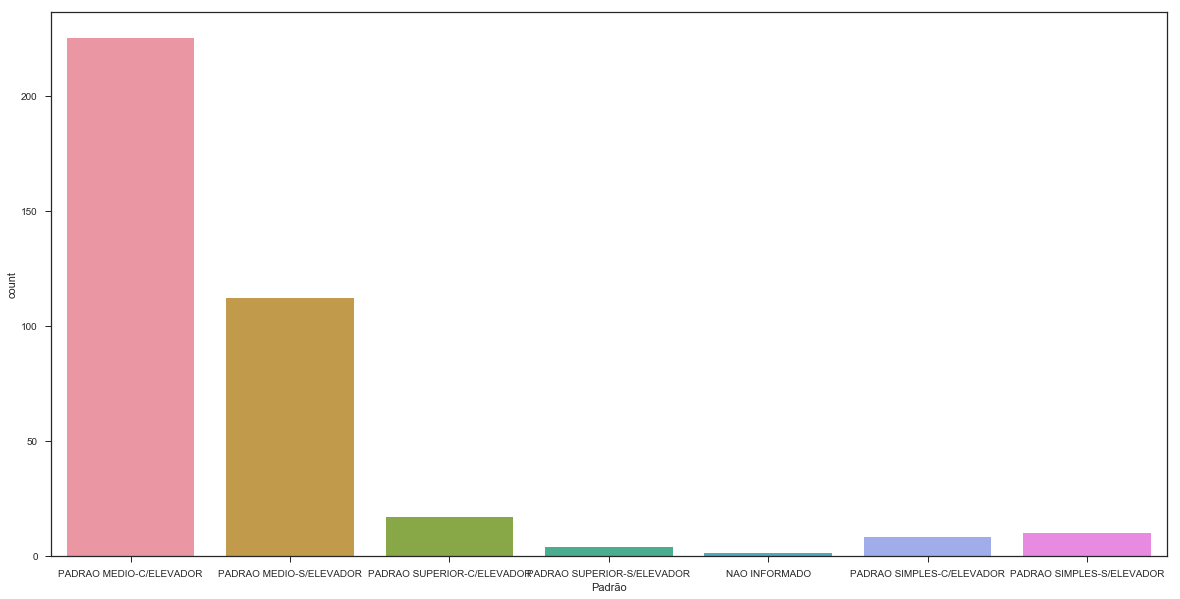

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x= df_c["Padrão"])


In [30]:
df_c["Padrão"].value_counts()

PADRAO MEDIO-C/ELEVADOR       225
PADRAO MEDIO-S/ELEVADOR       112
PADRAO SUPERIOR-C/ELEVADOR     17
PADRAO SIMPLES-S/ELEVADOR      10
PADRAO SIMPLES-C/ELEVADOR       8
PADRAO SUPERIOR-S/ELEVADOR      4
NAO INFORMADO                   1
Name: Padrão, dtype: int64

(array([ 81.,  18.,   7.,   2.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.]),
 <a list of 10 Patch objects>)

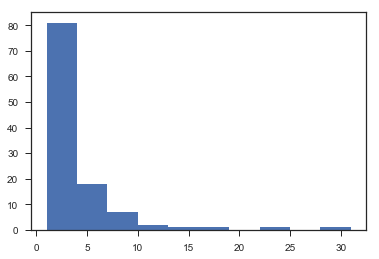

In [31]:
plt.hist(x = df_c['Nº Total de Unidades'].value_counts(), bins=10)

In [32]:
df_c['Nº Total de Unidades'].value_counts().describe()

count    112.000000
mean       3.366071
std        4.314224
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       31.000000
Name: Nº Total de Unidades, dtype: float64

# Entrando com série Histórica (será preciso fazer feature engineering para ter um VSO descente)

In [33]:
df_h = pd.read_csv('data/serie historica.csv', sep= ';')

In [34]:
df_h.head()

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa
0,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,06/08/2015
1,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,06/08/2015
2,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,06/10/2015
3,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,06/10/2015
4,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,03/12/2015


In [35]:
df_h.describe()

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque
count,8411.000000,8.411000e+03,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000,8411.000000
mean,26032.690168,3.162371e+05,3610.588208,0.557040,0.143871,18.710498,-591.459874,0.557040,0.425129,18.710498,12.989538
std,6656.588128,2.428554e+05,1118.365049,0.449326,0.154181,64.888407,426.911429,0.449326,0.446700,64.888407,55.046696
min,8918.000000,0.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1947.000000,0.000000,-6.000000,0.000000,-25.000000
25%,24304.000000,1.530000e+05,3029.359431,0.200000,0.033924,1.000000,-871.000000,0.200000,0.083300,1.000000,1.000000
50%,25604.000000,2.100000e+05,3461.538462,0.590900,0.126425,7.000000,-521.000000,0.590900,0.394700,7.000000,3.000000
75%,30193.000000,4.382325e+05,4262.356700,0.888900,0.239862,22.000000,-244.000000,0.888900,0.750000,22.000000,14.000000
max,39205.000000,3.246000e+06,7634.782609,7.000000,1.195204,1833.000000,0.000000,7.000000,1.000000,1833.000000,2076.000000


In [36]:
df_h.columns

Index(['RGI', '(VMU)Preço de venda da unidade na data pesquisa',
       '(VUV)Preço m2 privativo na data pesquisa', '% Vendido no Intervalo',
       '% Valorização', 'Unidades Vendidas no Intervalo', 'Intervalo em Mêses',
       '% Unidades Vendidas', '% Unidades a Vender', 'Unidades Vendidas',
       'Qtd em Estoque', 'Data Pesquisa'],
      dtype='object')

In [37]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8411 entries, 0 to 8410
Data columns (total 12 columns):
RGI                                                8411 non-null int64
(VMU)Preço de venda da unidade na data pesquisa    8411 non-null int64
(VUV)Preço m2 privativo na data pesquisa           8411 non-null float64
% Vendido no Intervalo                             8411 non-null float64
% Valorização                                      8411 non-null float64
Unidades Vendidas no Intervalo                     8411 non-null int64
Intervalo em Mêses                                 8411 non-null int64
% Unidades Vendidas                                8411 non-null float64
% Unidades a Vender                                8411 non-null float64
Unidades Vendidas                                  8411 non-null int64
Qtd em Estoque                                     8411 non-null int64
Data Pesquisa                                      8411 non-null object
dtypes: float64(5), int64(6), 

# Convertando dados para Data-Stamp

In [38]:
df_h['Data Pesquisa'] = pd.to_datetime(df_h['Data Pesquisa'], dayfirst= True, format='%d/%m/%Y', errors='coerce')

In [39]:
df_h

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa
0,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06
1,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06
2,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06
3,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06
4,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03
5,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03
6,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15
7,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15
8,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23
9,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23


In [40]:
len(df_h)

8411

(array([ 33.,  21.,  10.,  11.,   8.,   7.,   3.,   1.,   0.,   2.,   6.,
          4.,   2.,   1.,   5.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.]),
 array([   1.        ,    6.8358209 ,   12.67164179,   18.50746269,
          24.34328358,

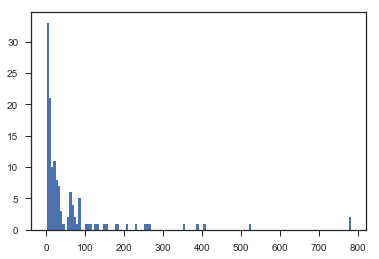

In [41]:
plt.hist(df_h['RGI'].value_counts(), bins = len(df_h['RGI'].value_counts()))

(array([ 61.,  25.,   8.,   4.,  10.,   6.,   2.,   2.,   1.,   2.,   0.,
          2.,   0.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([   1.  ,   16.64,   32.28,   47.92,   63.56,   79.2 ,   94.84,
         110.48,  126.12,  141.76,  157.4 ,  173.04,  188.68,  204.32,
         219.96,  235.6 ,  251.24,  266.88,  282.52,  298.16,  313.8 ,
         329.44,  345.08,  360.72,  376.36,  392.  ,  407.64,  423.28,
         438.92,  454.56,  470.2 ,  485.84,  501.48,  517.12,  532.76,
         548.4 ,  564.04,  579.68,  595.32,  610.96,  626.6 ,  642.24,
         657.88,  673.52,  689.16,  704.8 ,  720.44,  736.08,  751.72,
         767.36,  783.  ]),
 <a list of 50 Patch objects>)

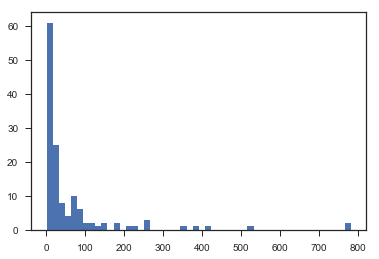

In [42]:
plt.hist(df_h['RGI'].value_counts(), bins = 50)

In [43]:
df_h['RGI'].value_counts()

24593    783
8918     780
24304    524
33421    408
27680    390
24215    352
28399    265
24149    262
25349    252
27696    231
24085    210
33442    182
26015    180
31856    153
27152    152
24356    132
34435    125
23593    114
24698    110
33045    102
32386     88
25799     85
31979     84
30193     84
31645     84
24454     80
36316     76
27671     72
24491     69
25740     66
        ... 
23103      6
37382      6
31836      5
39205      4
23853      4
36406      4
36307      4
27828      4
38878      4
25875      4
37005      4
23430      3
35751      3
38310      3
26232      2
38107      2
28470      2
23231      2
28471      2
27843      2
24742      2
24401      2
39197      1
36377      1
23439      1
38879      1
34475      1
25665      1
23003      1
34178      1
Name: RGI, Length: 134, dtype: int64

In [44]:
len (df_h['RGI'].value_counts())

134

In [45]:
(df_c['RGI'] ==39175 ).sum()

0

In [46]:
a  =df_h.groupby(['RGI']).count()
print (a)

       (VMU)Preço de venda da unidade na data pesquisa  \
RGI                                                      
8918                                               780   
23003                                                1   
23012                                                8   
23059                                               24   
23103                                                6   
23138                                               27   
23231                                                2   
23430                                                3   
23439                                                1   
23466                                                6   
23593                                              114   
23677                                               54   
23688                                               30   
23810                                               60   
23842                                               20   
23853         

In [47]:
len (df_c)

378

In [48]:
df_h['RGI'][1000
           ]

23677

# Atualização So-far : df_c tem  RGI's que no df_h não tem e provavelmente vice-versa. Preciso criaro VSo (acumular as vendas x data da pesquisa nos RGIs e depois append pro df_h e depois no df_c (conforme Rgi))  Depois disso dá pra pensar em avançar


In [49]:
df_h.head()

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa
0,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06
1,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06
2,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06
3,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06
4,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03


In [50]:
df_h['Data Pesquisa'][0]

Timestamp('2015-08-06 00:00:00')

In [51]:
df_h['Data Pesquisa'][1+0] - df_h['Data Pesquisa'][0]

Timedelta('0 days 00:00:00')

In [52]:
len(df_h)


8411

In [53]:
b = []
for i in range (8410):
    if df_h['RGI'][i+1] == df_h['RGI'][i]:
        a = df_h['Data Pesquisa'][1+i] - df_h['Data Pesquisa'][i]
        a = a.total_seconds()/86400
        b.append(a)
    
    else:
        a = 0
        b.append(a)
print (b[:5])

[0.0, 61.0, 0.0, 58.0, 0.0]


In [54]:
len(b)

8410

In [55]:
b.append(0.0)

In [56]:
b[-1]

0.0

In [57]:
len(b)

8411

In [58]:
df_h['Intervalo Pesquisa'] = b

In [59]:
type(df_h['Intervalo Pesquisa'][1])

numpy.float64

In [60]:
df_h[:30]

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa,Intervalo Pesquisa
0,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06,0.0
1,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06,61.0
2,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06,0.0
3,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06,58.0
4,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03,0.0
5,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03,74.0
6,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15,0.0
7,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15,37.0
8,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23,0.0
9,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23,27.0


# E agora, será que sempre temos datas replicadas ?? 

In [61]:
qtde_repetidos = []
for i in range (8410):
    repetido = df_h['Data Pesquisa'][i+1] == df_h['Data Pesquisa'][i]
    qtde_repetidos.append(repetido)

In [62]:
sum(qtde_repetidos)/len(df_h)

0.08690999881108073

Apenas 8,69%  dos dados tem datas repetidas na sequencia. Então, ok. Bora proceder

Definição de VSO = Vendas/Oferta no periodo. Então queremos as vendas ocorridas no periodo, dividido pelo estoque.... Seria interessante criar uma função pra realizar a mesma coisa com a valorização. Para isso temos as features: Unidades Vendidas, Estoque, Data Pesquisa, Intervalo Pesquisa, % vendido, %valorização... ALERTA!! Unidades Vendidas no Intervalo está cagado


Definino periodo de VSO para ser mensalmente (30 dias). E será meu modelo de VSOi (Vendas Sobre Oferta inicial)-> (V/Oi)/(Intervalo de pesquisa/30)

In [63]:
df_h['Unidades Vendidas'][1]/(df_h['Unidades Vendidas'][1]+df_h['Qtd em Estoque'][1])/ (df_h['Intervalo Pesquisa'][1]/30)

0.03783102143757882

In [64]:
vso = []
for i in range(8410):
    if df_h['Intervalo Pesquisa'][i] != 0:
        v = (df_h['Unidades Vendidas'][i+1]-df_h['Unidades Vendidas'][i])/(df_h['Unidades Vendidas'][i]+df_h['Qtd em Estoque'][i])/ (df_h['Intervalo Pesquisa'][i]/30)
    else:
        v = 0
    vso.append(v)

D:\anaconda\envs\tera-jul2018\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


In [65]:
vso[:10]

[0, 0.03783102143757882, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.085470085470085472]

In [66]:
len(vso)

8410

In [67]:
vso.append(0)

In [68]:
df_h['VSOi'] = vso

In [69]:
df_h[:30]

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa,Intervalo Pesquisa,VSOi
0,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06,0.0,0.000000
1,8918,190300,3558.339566,0.0769,0.000000,2,-5,0.0769,0.9231,2,24,2015-08-06,61.0,0.037831
2,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06,0.0,0.000000
3,8918,190300,3558.339566,0.1538,0.000000,4,-66,0.1538,0.8462,4,22,2015-10-06,58.0,0.000000
4,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03,0.0,0.000000
5,8918,194200,3631.264024,0.1538,0.020494,4,-124,0.1538,0.8462,4,22,2015-12-03,74.0,0.000000
6,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15,0.0,0.000000
7,8918,194200,3631.264024,0.1538,0.020494,4,-198,0.1538,0.8462,4,22,2016-02-15,37.0,0.000000
8,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23,0.0,0.000000
9,8918,189900,3550.860135,0.1538,-0.002102,4,-235,0.1538,0.8462,4,22,2016-03-23,27.0,0.085470


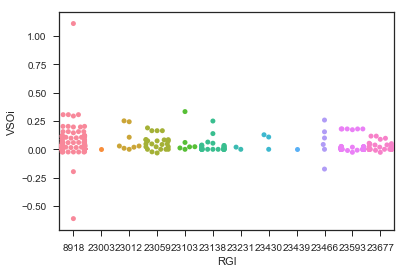

In [70]:
sns.swarmplot(df_h['RGI'][:1000],df_h['VSOi'][:1000])

In [71]:
a = (x for x in df_h['VSOi'] if x > 1)

In [72]:
df_h2 = df_h.loc[df_h['VSOi'] != 0]

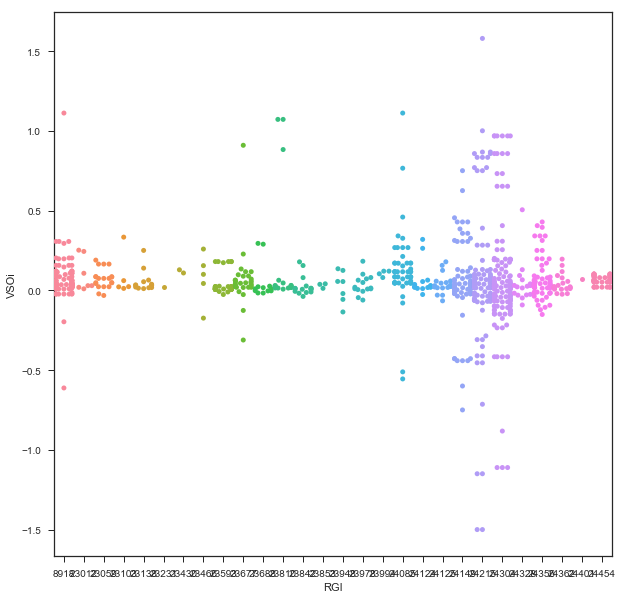

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(df_h2['RGI'][:1000],df_h2['VSOi'])


# acho que agora pro VSOi devo criar uma métrica de media/mediana de VSOi pra pegar quem se manteve constantemente vendendo bem, isso deve facilitar a leitura dos dados

# Mas antes, conferir esses VSOi maiores que 1

In [74]:
a = df_h2.loc[df_h2['VSOi']<-.5]
a

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa,Intervalo Pesquisa,VSOi
493,8918,149900,1414.150943,3.0000,0.046788,3,-644,3.0000,-2.0000,3,-2,2011-01-05,98.0,-0.612245
1234,24085,117000,2925.000000,1.7500,-0.059712,7,-228,1.7500,-0.7500,7,-3,2014-09-17,44.0,-0.511364
1264,24085,117000,2925.000000,0.8750,-0.059712,7,-201,0.8750,0.1250,7,1,2014-08-21,27.0,-0.555556
1692,24149,497800,3891.494684,0.5000,0.193479,1,-574,0.5000,0.5000,1,1,2014-10-27,25.0,-0.600000
1715,24149,545000,4260.475297,1.0000,0.306641,2,-1388,1.0000,0.0000,2,0,2017-01-18,20.0,-0.750000
1758,24215,737000,5872.977927,0.8333,0.415946,25,-1388,0.8333,0.1667,25,5,2017-01-18,20.0,-1.150000
1804,24215,737000,5872.977927,0.8667,0.415946,26,-1388,0.8667,0.1333,26,4,2017-01-18,20.0,-1.150000
1980,24215,762141,4774.422101,1.0000,0.327540,1,-1220,1.0000,0.0000,1,0,2016-08-03,42.0,-0.714286
2027,24215,744000,4500.362932,1.0000,0.281875,1,-1388,1.0000,0.0000,1,0,2017-01-18,20.0,-1.500000
2068,24215,744000,4500.362932,1.0000,0.281875,1,-1388,1.0000,0.0000,1,0,2017-01-18,20.0,-1.500000


In [75]:
df_h2.loc[579]

RGI                                                               8918
(VMU)Preço de venda da unidade na data pesquisa                 319280
(VUV)Preço m2 privativo na data pesquisa                       3249.67
% Vendido no Intervalo                                               0
% Valorização                                                 0.242335
Unidades Vendidas no Intervalo                                       0
Intervalo em Mêses                                                -235
% Unidades Vendidas                                                  0
% Unidades a Vender                                                  1
Unidades Vendidas                                                    0
Qtd em Estoque                                                       1
Data Pesquisa                                      2016-03-23 00:00:00
Intervalo Pesquisa                                                  27
VSOi                                                           1.11111
Name: 

In [76]:
df_h[3185: 3196]

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa,Intervalo Pesquisa,VSOi
3185,24593,133000,3410.256410,1.00,0.268939,4,-793,1.00,0.00,4,0,2015-07-03,69.0,0.000000
3186,24593,133000,3410.256410,1.00,0.268939,4,-862,1.00,0.00,4,0,2015-09-10,49.0,0.000000
3187,24593,133000,3410.256410,1.00,0.268939,4,-911,1.00,0.00,4,0,2015-10-29,-889.0,-0.126547
3188,24593,104812,2687.487179,4.75,0.000000,19,-22,4.75,-3.75,19,-15,2013-05-23,62.0,0.846774
3189,24593,104812,2687.487179,6.50,0.000000,26,-84,6.50,-5.50,26,-22,2013-07-24,76.0,-0.592105
3190,24593,110200,2825.641026,5.00,0.051406,20,-160,5.00,-4.00,20,-16,2013-10-08,30.0,2.000000
3191,24593,110000,2820.512821,7.00,0.049498,28,-190,7.00,-6.00,28,-24,2013-11-07,42.0,-2.142857
3192,24593,120000,3076.923077,4.00,0.144907,16,-232,4.00,-3.00,16,-12,2013-12-19,85.0,0.000000
3193,24593,135000,3461.538462,4.00,0.288020,16,-317,4.00,-3.00,16,-12,2014-03-14,110.0,0.681818
3194,24593,135000,3461.538462,6.50,0.288020,26,-427,6.50,-5.50,26,-22,2014-07-02,55.0,0.000000


# Problemas: Coluna estoque louca (vai diminuindo e pode chegar à numeros negativos, wtf) VSOi pode ficar superior à 1.0 se o intervalo de pesquisa for inferior à 30 dias

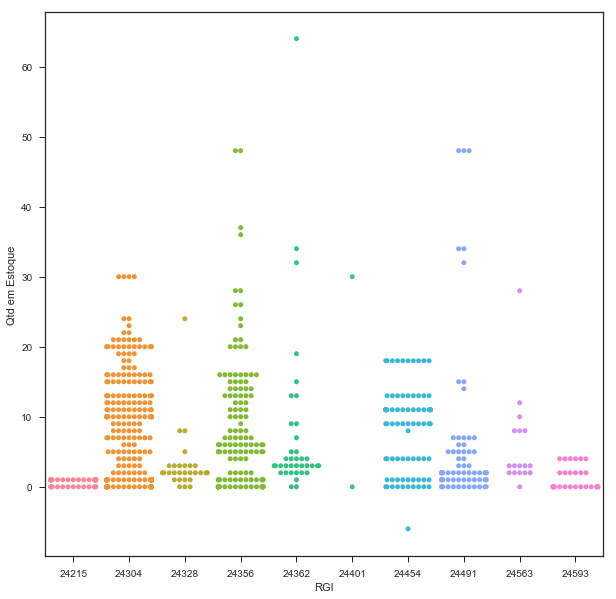

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(df_h['RGI'][2000:3000],df_h['Qtd em Estoque'][2000:3000])

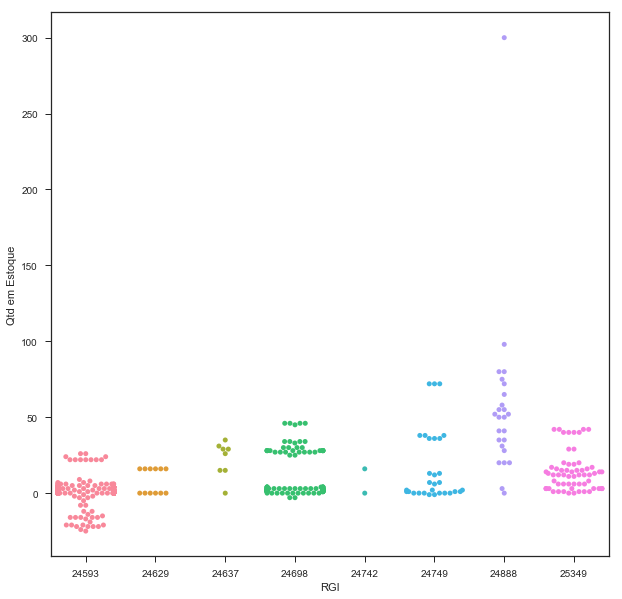

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(df_h['RGI'][3000:4000],df_h['Qtd em Estoque'][3000:4000])

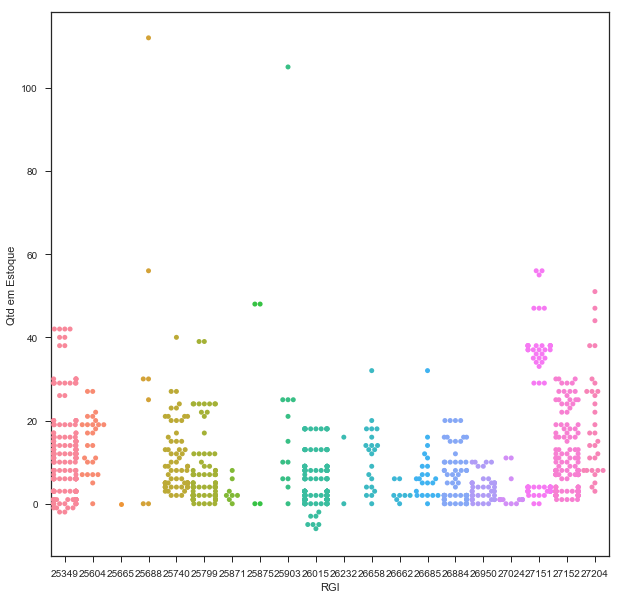

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
sns.swarmplot(df_h['RGI'][4000:5000],df_h['Qtd em Estoque'][4000:5000])

In [80]:
df_h[df_h['Qtd em Estoque']<0]

,RGI,(VMU)Preço de venda da unidade na data pesquisa,(VUV)Preço m2 privativo na data pesquisa,% Vendido no Intervalo,% Valorização,Unidades Vendidas no Intervalo,Intervalo em Mêses,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,Data Pesquisa,Intervalo Pesquisa,VSOi
484,8918,149900,1414.150943,3.0000,0.046788,3,-306,3.0000,-2.0000,3,-2,2010-02-01,0.0,0.000000
485,8918,149900,1414.150943,3.0000,0.046788,3,-306,3.0000,-2.0000,3,-2,2010-02-01,59.0,0.000000
486,8918,149900,1414.150943,3.0000,0.046788,3,-365,3.0000,-2.0000,3,-2,2010-04-01,0.0,0.000000
487,8918,149900,1414.150943,3.0000,0.046788,3,-365,3.0000,-2.0000,3,-2,2010-04-01,91.0,0.000000
488,8918,149900,1414.150943,3.0000,0.046788,3,-456,3.0000,-2.0000,3,-2,2010-07-01,0.0,0.000000
489,8918,149900,1414.150943,3.0000,0.046788,3,-456,3.0000,-2.0000,3,-2,2010-07-01,92.0,0.000000
490,8918,149900,1414.150943,3.0000,0.046788,3,-548,3.0000,-2.0000,3,-2,2010-10-01,0.0,0.000000
491,8918,149900,1414.150943,3.0000,0.046788,3,-548,3.0000,-2.0000,3,-2,2010-10-01,96.0,0.000000
492,8918,149900,1414.150943,3.0000,0.046788,3,-644,3.0000,-2.0000,3,-2,2011-01-05,0.0,0.000000
493,8918,149900,1414.150943,3.0000,0.046788,3,-644,3.0000,-2.0000,3,-2,2011-01-05,98.0,-0.612245


Será que criar uma coluna com total de unidaddes ? e verificar se ela se altera  ? talvez uma coluna com um coef de variação de total de unidades.

abacate para teste